# Analysis of a-SMA intensity in PDGFR-b positive scHSCs and pHSCs

## Aims of the analysis
The following script aims to measure the intensity of the fluorescent signal produced by a-SMA in images captured by confocal microscopy. The confocal images are of human pluripotent stem cell-derived hepatic stellate cells (scHSCs) and human primary hepatic stellate cells (pHSCs). 

All samples were treated with the same primary and secondary antibodies, all with the same dilution factors and overnight incubation. The settings on the confocal microscope was equal for all samples that are being compared. 

The analysis is performed by a simple script that computes a mask of the PDGFR-b positive area of the image and measures the mean integral intensity of the a-SMA channel of each individual image.

## Cell line names
The following names of the cell lines are used in the script:
* scHSC_1: H1
* scHSC_2: WTC-11

## Acknowledgement
I would like to extend my warmest thanks to Thomas Combriat (PhD) for his help writing and running this script.

# Script 
## 1. Import libraries and images for analysis and test the method
The following code imports the libraries used in the rest of the code as well as the confocal images that the analysis is performed on. The computing of the masks and average intensities is maually checked and the appropriate parameters are properly asjuted if needed (see in-code comments).

In [1]:
%matplotlib nbagg

### EXTERNAL LIBRAIRIES IMPORT
import numpy as np  # numerics
import czifile as cz  # czi file opener
import os as os # platform independant file manager
import matplotlib.pyplot as plt
from utils.image_manager import *
from utils.misc import *
import pandas as pd


In [2]:
# Define the path to the folder the images are stored
path = "data"

In [3]:
# Creating an object, of type Image, which is named test

ls = os.listdir(path) #list the images
print(ls)
test = Image(path+os.sep+ls[0])  # take one for testing and create an Image
print(test.ID) #ID of the chosen one

['E160822_H1_Activation24h-Ctr_40X_PDGFRb-COL1a1-aSMA_1.czi', 'E160822_H1_Activation24h-Ctr_40X_PDGFRb-COL1a1-aSMA_2.czi', 'E160822_H1_Activation24h-Ctr_40X_PDGFRb-COL1a1-aSMA_3.czi', 'E160822_H1_Activation24h-Ctr_40X_PDGFRb-COL1a1-aSMA_4.czi', 'E160822_H1_Activation24h-Ctr_40X_PDGFRb-COL1a1-aSMA_5.czi', 'E160822_H1_Activation24h-TGF-b_40X_PDGFRb-COL1a1-aSMA_1.czi', 'E160822_H1_Activation24h-TGF-b_40X_PDGFRb-COL1a1-aSMA_2.czi', 'E160822_H1_Activation24h-TGF-b_40X_PDGFRb-COL1a1-aSMA_3.czi', 'E160822_H1_Activation24h-TGF-b_40X_PDGFRb-COL1a1-aSMA_5.czi', 'E290422_WTC-11_Activation-24h-Ctr_40X_PDGFRb-COL1a1-aSMA_2.czi', 'E290422_WTC-11_Activation-24h-Ctr_40X_PDGFRb-COL1a1-aSMA_3.czi', 'E290422_WTC-11_Activation-24h-Ctr_40X_PDGFRb-COL1a1-aSMA_4.czi', 'E290422_WTC-11_Activation-24h-Ctr_40X_PDGFRb-COL1a1-aSMA_5.czi', 'E290422_WTC-11_Activation-24h-TGFb_40X_PDGFRb-COL1a1-aSMA_1.czi', 'E290422_WTC-11_Activation-24h-TGFb_40X_PDGFRb-COL1a1-aSMA_2.czi', 'E290422_WTC-11_Activation-24h-TGFb_40X_PDGF

<IPython.core.display.Javascript object>


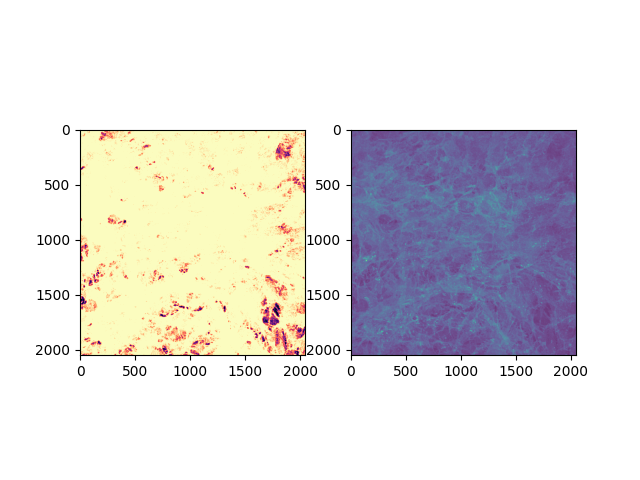

In [4]:
## Segmentation test
# Compute a mask from the MIP on channel 0 (PDGFR-b)
# Note: Check (and if necessary: properly adjust) the threshold to see if it masks correctly
test.mask = compute_mask(test.get_MIP(0), method="manual",threshold = 14) 
plt.figure()

ax =plt.subplot(121)
plt.imshow(test.mask,cmap="magma")
plt.subplot(122,sharex=ax,sharey=ax)
# Note: Check (and if necessary: properly adjust) the alpha to see if it masks correctly
plt.imshow(test.get_MIP(0),alpha =0.8) # AP -> average of the stack


In [5]:
# Compute the average intensity of the image on channel 1 (a-SMA here) using the middle image, considering only the pixels in the mask
integrate_intensity(test.data[1][1], test.mask)

18.716462738099665

In [6]:
# We will load all the data into one group before dividing it into subcategories
# We can use the ID to do that

# Create an empty list to store all images
all_grp = []

ls = os.listdir(path) 

# Create a for-loop that appends all images into the empty list
for i in ls:
    all_grp.append(Image(path+os.sep+i)) # Loading all images in the all_grp
    print("Loaded: "+ all_grp[-1].ID)


Loaded: E160822_H1_Activation24h-Ctr_40X_PDGFRb-COL1a1-aSMA_1.czi
Loaded: E160822_H1_Activation24h-Ctr_40X_PDGFRb-COL1a1-aSMA_2.czi
Loaded: E160822_H1_Activation24h-Ctr_40X_PDGFRb-COL1a1-aSMA_3.czi
Loaded: E160822_H1_Activation24h-Ctr_40X_PDGFRb-COL1a1-aSMA_4.czi
Loaded: E160822_H1_Activation24h-Ctr_40X_PDGFRb-COL1a1-aSMA_5.czi
Loaded: E160822_H1_Activation24h-TGF-b_40X_PDGFRb-COL1a1-aSMA_1.czi
Loaded: E160822_H1_Activation24h-TGF-b_40X_PDGFRb-COL1a1-aSMA_2.czi
Loaded: E160822_H1_Activation24h-TGF-b_40X_PDGFRb-COL1a1-aSMA_3.czi
Loaded: E160822_H1_Activation24h-TGF-b_40X_PDGFRb-COL1a1-aSMA_5.czi
Loaded: E290422_WTC-11_Activation-24h-Ctr_40X_PDGFRb-COL1a1-aSMA_2.czi
Loaded: E290422_WTC-11_Activation-24h-Ctr_40X_PDGFRb-COL1a1-aSMA_3.czi
Loaded: E290422_WTC-11_Activation-24h-Ctr_40X_PDGFRb-COL1a1-aSMA_4.czi
Loaded: E290422_WTC-11_Activation-24h-Ctr_40X_PDGFRb-COL1a1-aSMA_5.czi
Loaded: E290422_WTC-11_Activation-24h-TGFb_40X_PDGFRb-COL1a1-aSMA_1.czi
Loaded: E290422_WTC-11_Activation-24h-TGFb

## 2. Sort the images and make visual representations of the average a-SMA intensity
Sort images using ID (file name) and group them accoridng to cell line and treatment. These groups can then be visually represented for quality control of the method.

In [7]:
# Create groups for each separate cell line
H1_grp = []
WTC_grp = []

# Sort the images 
for i in all_grp:
    if ("H1" in i.ID): # Check if "H1" is in the filename
        H1_grp.append(i)
    elif ("WTC" in i.ID): # Check if "WTC" is in the filename
        WTC_grp.append(i)
        
# Control that the correct amount of images have been allocated to each list
print("* H1 group is of length: "+str(len(H1_grp)))
print("* WTC-11 group is of length: "+str(len(WTC_grp)))

* H1 group is of length: 10
* WTC-11 group is of length: 10


<IPython.core.display.Javascript object>


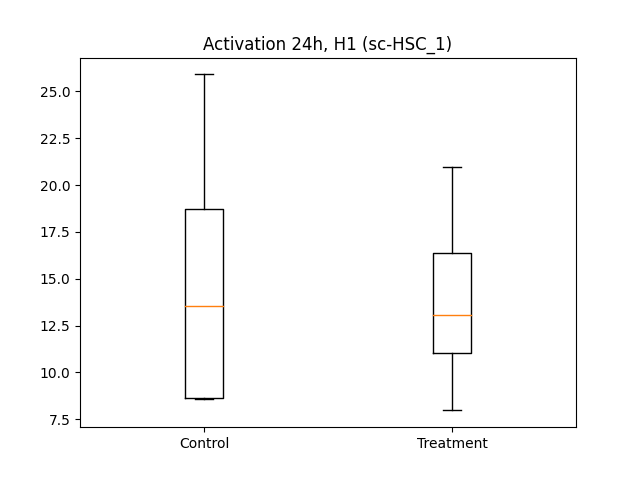

In [8]:
# Now, we can divide the images of each cell line into two groups (+/- TGF-b), and compute the mask of the PDGFR-b channel
control_H1_grp = [] # Empty list
treatment_H1_grp = [] # Empty list

for i in H1_grp:
    i.mask = compute_mask(i.get_MIP(0), method="manual",threshold = 14) # Use the MIP of the PDGFR-b channel (channel 0) to compute the mask
    if ("Ctr" in i.ID):  # Check if "Ctr" is in the filename
        control_H1_grp.append(i)
    elif ("TGF" in i.ID): # Check if "TGF" is in the filename
        treatment_H1_grp.append(i)
        
## Compute all the average intensities of the middle image in the z-stack of the a-SMA channelfor the two groups, and the plots the distribution
distributions_H1 = [[],[]] # a list of list, first one will contain the distribution for the control, the second for the treatment
names = ["Control", "Treatment"]

for i in control_H1_grp:
    distributions_H1[0].append(integrate_intensity(i.data[1][1], i.mask))
for i in treatment_H1_grp:
    distributions_H1[1].append(integrate_intensity(i.data[1][1], i.mask))
    
# Plotting of the distributions
plt.figure()
plt.boxplot(distributions_H1,labels = names)
plt.title("Activation 24h, H1 (sc-HSC_1)")
plt.show()

<IPython.core.display.Javascript object>


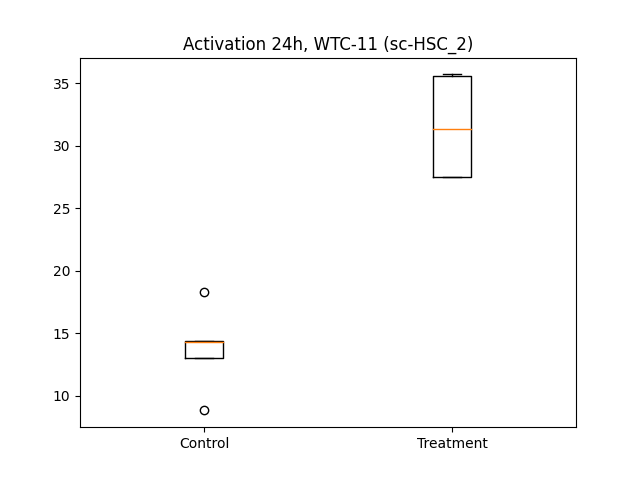

In [9]:
control_WTC_grp = [] # Empty list
treatment_WTC_grp = [] # Empty list

for i in WTC_grp:
    i.mask = compute_mask(i.get_MIP(0), method="manual",threshold = 14)
    if ("Ctr" in i.ID):  # Check if "Control" is in the filename
        control_WTC_grp.append(i)
    elif ("TGF" in i.ID):
        treatment_WTC_grp.append(i)
        
distributions_WTC = [[],[]]
names = ["Control", "Treatment"]
for i in control_WTC_grp:
    distributions_WTC[0].append(integrate_intensity(i.data[1][1], i.mask))
for i in treatment_WTC_grp:
    distributions_WTC[1].append(integrate_intensity(i.data[1][1], i.mask))
    
# Plotting of the distributions
plt.figure()
plt.boxplot(distributions_WTC,labels = names)
plt.title("Activation 24h, WTC-11 (sc-HSC_2)")
plt.show()

<IPython.core.display.Javascript object>


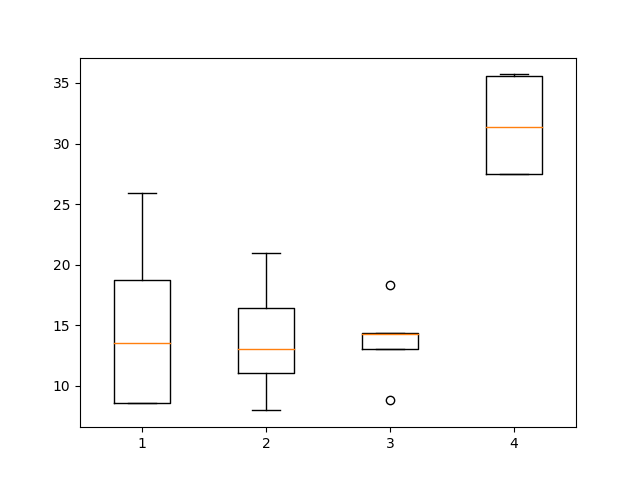

In [10]:
# If desired, the data of all the cell l ines can be plotted in the same graph
distributions_all = [[],[],[],[]] # a list of list, first one will contain the distribution for the control, the second for the treatment
#names = ["Control", "Treatment"]

for i in control_H1_grp:
    distributions_all[0].append(integrate_intensity(i.data[1][1], i.mask))
for i in treatment_H1_grp:
    distributions_all[1].append(integrate_intensity(i.data[1][1], i.mask))
    
for i in control_WTC_grp:
    distributions_all[2].append(integrate_intensity(i.data[1][1], i.mask))
for i in treatment_WTC_grp:
    distributions_all[3].append(integrate_intensity(i.data[1][1], i.mask))


# Plotting of the distributions
plt.figure()
plt.boxplot(distributions_all)
plt.show()

## 3. Sort the computed average a-SMA intensities and export them for further analysis
The average a-SMA intensities are exported to an Excel document and used for further statistical analysis in GraphPad Prism (version 9.3.1).

In [11]:
# Create two lists of lists:
# 'distributions_control' contains the control distributions of each cell line
# 'distributions_treatment' contains the TF-b-treated distributions of each cell line
distributions_control = [[],[]] 
distributions_treatment = [[],[]]

for i in control_H1_grp:
    distributions_control[0].append(integrate_intensity(i.data[1][1], i.mask))
for i in treatment_H1_grp:
    distributions_treatment[0].append(integrate_intensity(i.data[1][1], i.mask))
    
for i in control_WTC_grp:
    distributions_control[1].append(integrate_intensity(i.data[1][1], i.mask))
for i in treatment_WTC_grp:
    distributions_treatment[1].append(integrate_intensity(i.data[1][1], i.mask))

In [12]:
# Export the computed values to an Excel document

df_control = pd.DataFrame(distributions_control)
df_treatment = pd.DataFrame(distributions_treatment)

df_control.columns = ['Rep1', 'Rep2', 'Rep3', 'Rep4', 'Rep5']
df_treatment.columns = ['Rep1', 'Rep2', 'Rep3', 'Rep4', 'Rep5']

df_control.index = ['sc-HSC-1', 'sc-HSC-2']
df_treatment.index = ['sc-HSC-1', 'sc-HSC-2']

writer = pd.ExcelWriter('a-SMA_intensity_analysis_activation-24h.xlsx', engine='xlsxwriter')
df_control.to_excel(writer, sheet_name='Control', index=True)
df_treatment.to_excel(writer, sheet_name='Treatment', index=True)
writer.save()

<ipython-input-12-6e5d8fe5eea0>:15: FutureWarning: save is not part of the public API, usage can give in unexpected results and will be removed in a future version
  writer.save()
